In [1]:
%matplotlib notebook
import numpy as np
from astropy.io import votable
import matplotlib.pyplot as plt

In [2]:
infile = '/home/beards/code/mwa_mmodes/data_getting/asvo_votable.xml'
myvotable = votable.parse(infile)
table = myvotable.resources[0].tables[0]

In [3]:
obsids = table.array[:]['obs_id'].data.astype(np.int)
order = np.argsort(obsids)
obsids = obsids[order]
titles = table.array[:]['obs_title'].data[order]

In [4]:
ind = np.where(titles != 'zenith')[0]
cal_obsids = obsids[ind]
cal_titles = titles[ind]

<IPython.core.display.Javascript object>


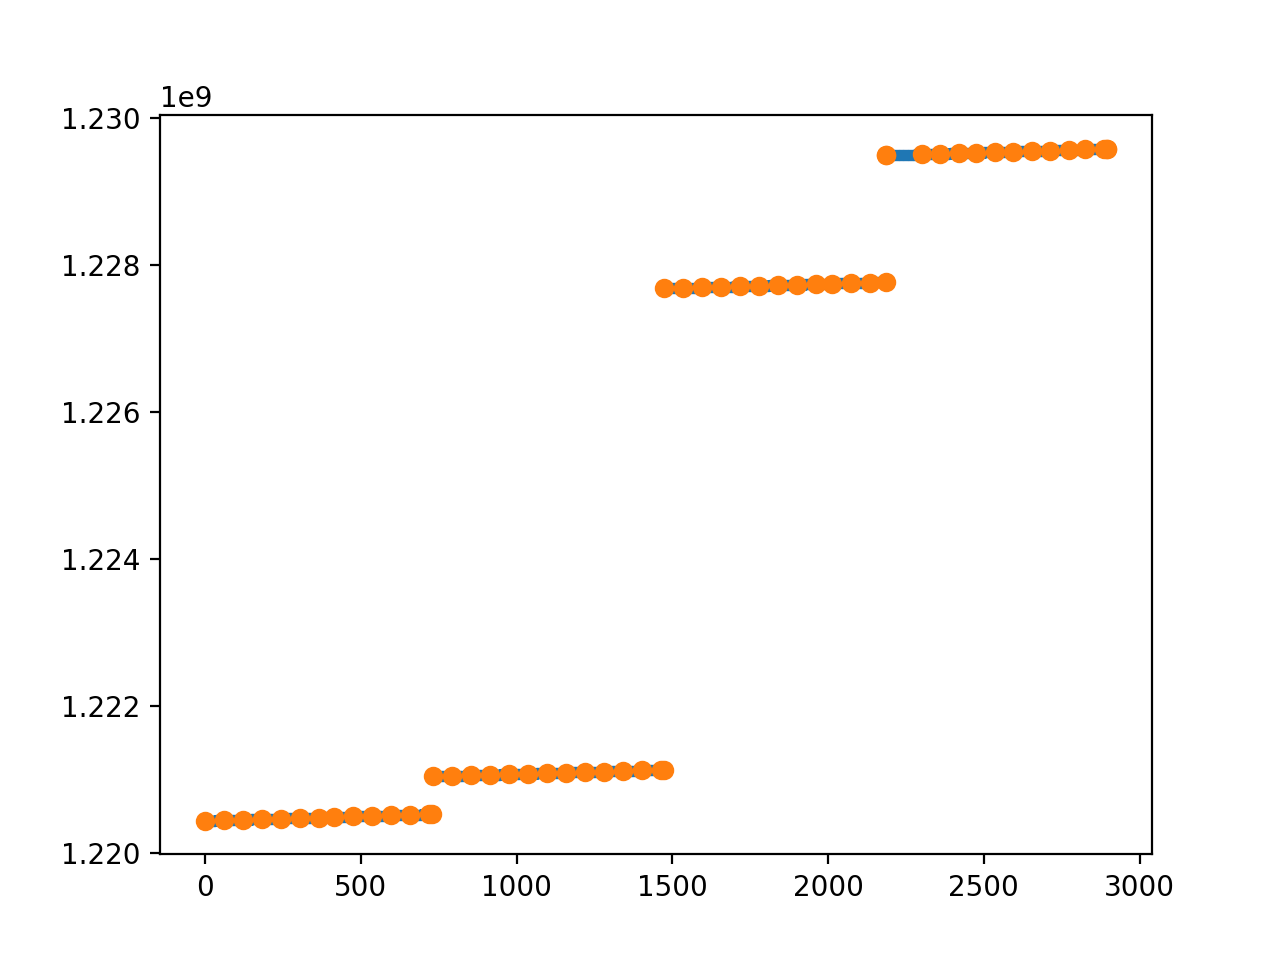

In [5]:
plt.figure()
plt.plot(obsids, '.')
plt.plot(ind, cal_obsids, 'o')

<IPython.core.display.Javascript object>


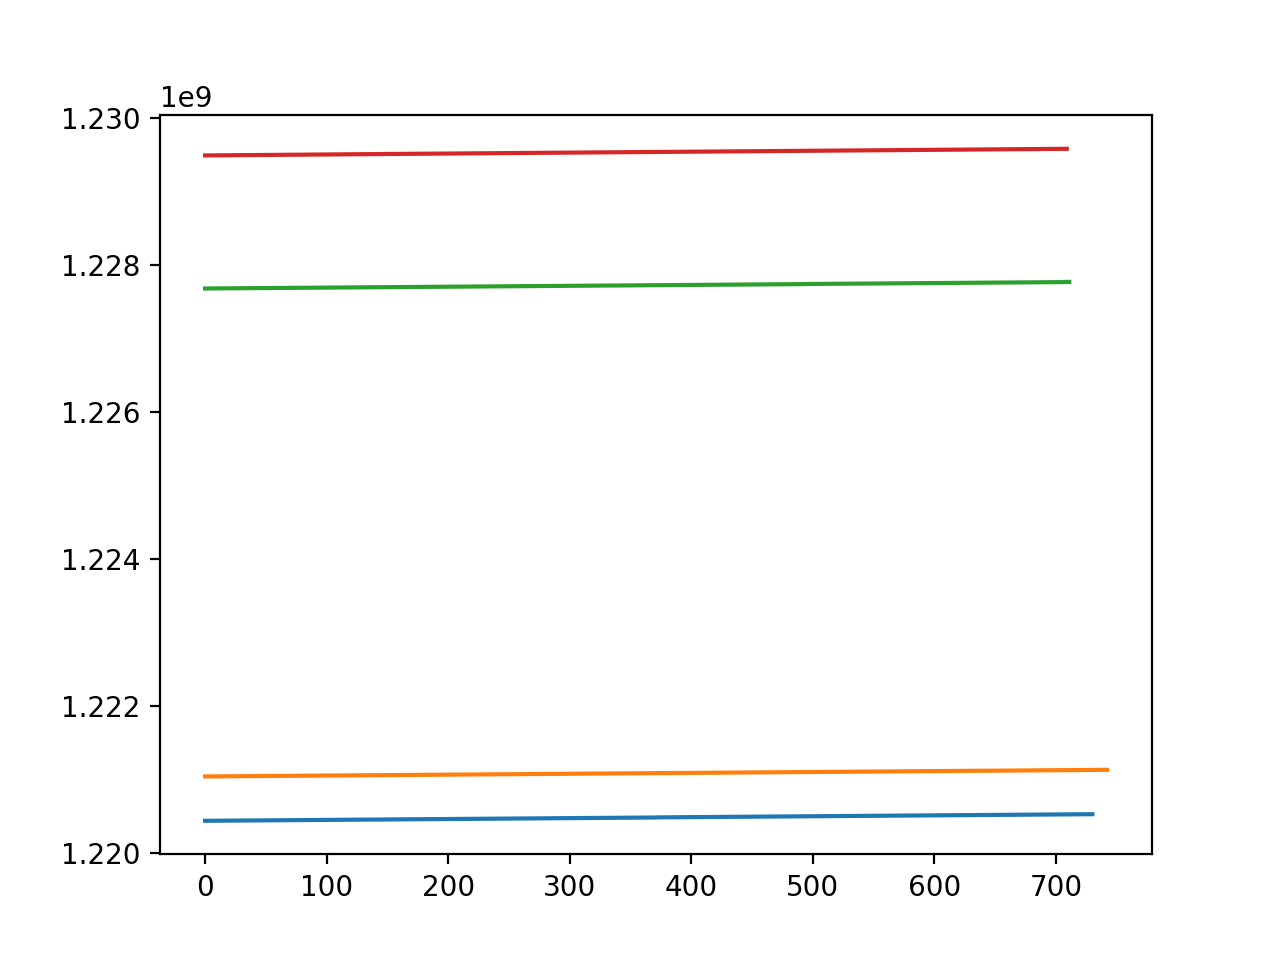

In [80]:
runs = [obsids[:731], obsids[731:1474], obsids[1474:2186], obsids[2186:]]
plt.figure()
for run in runs:
    plt.plot(run)

In [91]:
for i, run in enumerate(runs):
    np.savetxt('/home/beards/code/mwa_mmodes/data_getting/run' + str(i) + '.txt', run)

In [89]:
nper_job = 50
args = 'job_type=c, timeres=2, freqres=40, edgewidth=80, conversion=uvfits, calibrate=false, allowmissing=true, flagdcchannels=true, noantennapruning=true\n'

for ri, run in enumerate(runs):
    ntot = len(run)

    for ji in range(0, ntot / nper_job + 1):
        job_file = '/home/beards/code/mwa_mmodes/data_getting/run' + str(ri) + '_job' + str(ji + 1) + '.csv'
        maxind = np.min([(ji + 1) * nper_job, len(run) + 1])
        for obs in run[ji * nper_job:maxind]:
            with open(job_file, 'a') as thefile:
                thefile.write('obs_id=' + str(obs) + ', ' + args)
    

In [86]:
foo = np.arange(13)
for i in range(0, len(foo) / 5 + 1):
    maxind = np.min([(i + 1) * 5, len(foo) + 1])
    print(maxind)
    print(foo[i * 5:maxind])

5
[0 1 2 3 4]
10
[5 6 7 8 9]
14
[10 11 12]


In [71]:
for ji in range(1, ntot / nper_job + 1):
    print(ji)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
